In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [5]:
print(df.shape)

(7043, 21)


In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.duplicated().sum()

0

In [8]:
df.drop('customerID', inplace=True, axis=1)

In [9]:
# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaN values if necessary (for example, with 0)
df['TotalCharges'].fillna(0, inplace=True)

# Convert to int
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define feature columns
feature_cols = df.columns[:-1]

# Preprocessing pipelines for numerical and categorical data
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = list(set(feature_cols) - set(numerical_features))

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform the data
X = df[feature_cols]
X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed features into a DataFrame for easy viewing
feature_names = (numerical_features + 
                 list(preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_features)))
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display the preprocessed DataFrame
print(X_preprocessed_df.head())

     tenure  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0 -1.277445       -1.160323     -0.992611            1.0          0.0   
1  0.066327       -0.259629     -0.172165            0.0          1.0   
2 -1.236724       -0.362660     -0.958066            0.0          1.0   
3  0.514251       -0.746535     -0.193672            0.0          1.0   
4 -1.236724        0.197365     -0.938874            1.0          0.0   

   Partner_No  Partner_Yes  OnlineBackup_No  OnlineBackup_No internet service  \
0         0.0          1.0              0.0                               0.0   
1         1.0          0.0              1.0                               0.0   
2         1.0          0.0              0.0                               0.0   
3         1.0          0.0              1.0                               0.0   
4         1.0          0.0              1.0                               0.0   

   OnlineBackup_Yes  ...  PaperlessBilling_No  PaperlessBilling_Yes  \
0  

In [12]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [13]:

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [14]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [15]:
# If the target column has Yes it is encoded as 1 others as 0
y= np.where(y=='Yes', 1,0)

In [16]:
y

array([0, 0, 1, ..., 0, 1, 0])

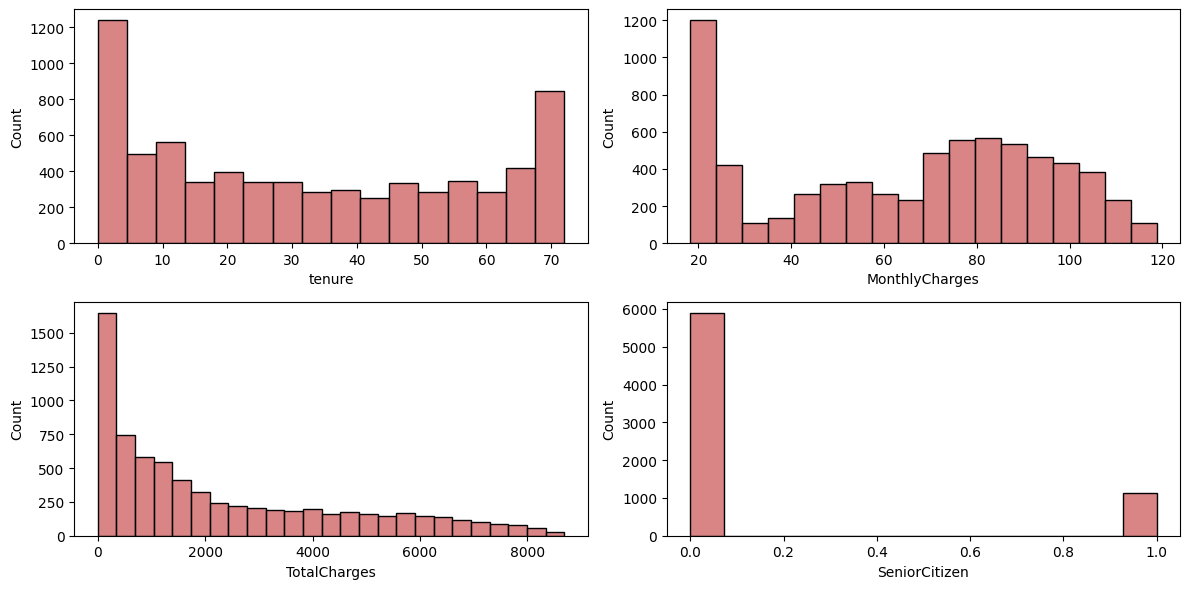

In [17]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['tenure','MonthlyCharges','TotalCharges', 'SeniorCitizen']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [25]:
# Check Skewness
X[continuous_features].skew(axis=0, skipna=True)

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [24]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [23]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 1


In [21]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 16


In [22]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 4


In [26]:
from scipy.stats import skew, boxcox
from sklearn.preprocessing import PowerTransformer

# Calculate original skewness
original_skewness = df[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(skew)
print("Original Skewness:\n", original_skewness)

# Log Transformation
df['tenure_log'] = np.log1p(df['tenure'])
df['MonthlyCharges_log'] = np.log1p(df['MonthlyCharges'])
df['TotalCharges_log'] = np.log1p(df['TotalCharges'])
log_skewness = df[['tenure_log', 'MonthlyCharges_log', 'TotalCharges_log']].apply(skew)
print("\nLog Transformation Skewness:\n", log_skewness)

# Square Root Transformation
df['tenure_sqrt'] = np.sqrt(df['tenure'])
df['MonthlyCharges_sqrt'] = np.sqrt(df['MonthlyCharges'])
df['TotalCharges_sqrt'] = np.sqrt(df['TotalCharges'])
sqrt_skewness = df[['tenure_sqrt', 'MonthlyCharges_sqrt', 'TotalCharges_sqrt']].apply(skew)
print("\nSquare Root Transformation Skewness:\n", sqrt_skewness)

# Box-Cox Transformation
df['TotalCharges_boxcox'], _ = boxcox(df['TotalCharges'] + 1)
df['tenure_boxcox'], _ = boxcox(df['tenure'] + 1)
df['MonthlyCharges_boxcox'], _ = boxcox(df['MonthlyCharges'] + 1)
boxcox_skewness = df[['tenure_boxcox', 'MonthlyCharges_boxcox', 'TotalCharges_boxcox']].apply(skew)
print("\nBox-Cox Transformation Skewness:\n", boxcox_skewness)

# Yeo-Johnson Transformation
pt = PowerTransformer(method='yeo-johnson')
df[['tenure_yeo', 'MonthlyCharges_yeo', 'TotalCharges_yeo']] = pt.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])
yeo_skewness = df[['tenure_yeo', 'MonthlyCharges_yeo', 'TotalCharges_yeo']].apply(skew)
print("\nYeo-Johnson Transformation Skewness:\n", yeo_skewness)

# Reciprocal Transformation
df['tenure_reciprocal'] = 1 / (df['tenure'] + 1)
df['MonthlyCharges_reciprocal'] = 1 / (df['MonthlyCharges'] + 1)
df['TotalCharges_reciprocal'] = 1 / (df['TotalCharges'] + 1)
reciprocal_skewness = df[['tenure_reciprocal', 'MonthlyCharges_reciprocal', 'TotalCharges_reciprocal']].apply(skew)
print("\nReciprocal Transformation Skewness:\n", reciprocal_skewness)

Original Skewness:
 tenure            0.239489
MonthlyCharges   -0.220477
TotalCharges      0.963029
dtype: float64

Log Transformation Skewness:
 tenure_log           -0.778204
MonthlyCharges_log   -0.718864
TotalCharges_log     -0.824282
dtype: float64

Square Root Transformation Skewness:
 tenure_sqrt           -0.235949
MonthlyCharges_sqrt   -0.484454
TotalCharges_sqrt      0.307655
dtype: float64

Box-Cox Transformation Skewness:
 tenure_boxcox           -0.243273
MonthlyCharges_boxcox   -0.258980
TotalCharges_boxcox     -0.146089
dtype: float64

Yeo-Johnson Transformation Skewness:
 tenure_yeo           -0.243273
MonthlyCharges_yeo   -0.258980
TotalCharges_yeo     -0.146089
dtype: float64

Reciprocal Transformation Skewness:
 tenure_reciprocal             2.105967
MonthlyCharges_reciprocal     1.092590
TotalCharges_reciprocal      23.550271
dtype: float64


In [27]:
for feature in cat_features:
    print(feature,':', df[feature].nunique())

gender : 2
Partner : 2
Dependents : 2
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
Churn : 2


In [28]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [29]:
num_features

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [30]:
# Define column groups
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

skewed_numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
other_numerical_columns = ['SeniorCitizen']

# Define preprocessors
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

skewed_numerical_transformer = Pipeline(steps=[
    ('yeo-johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

other_numerical_transformer = StandardScaler()

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', categorical_transformer, categorical_columns),
        ('skewed_num', skewed_numerical_transformer, skewed_numerical_columns),
        ('num', other_numerical_transformer, other_numerical_columns)
    ])

X_preprocessed = preprocessor.fit_transform(X)

# Convert the preprocessed features into a DataFrame for easy viewing
# Get feature names for the onehot encoded columns
onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(categorical_columns)
feature_names = list(onehot_feature_names) + skewed_numerical_columns + other_numerical_columns
X = pd.DataFrame(X_preprocessed, columns=feature_names)
#X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Display the preprocessed DataFrame
print(X.head())

   gender_Female  gender_Male  Partner_No  Partner_Yes  Dependents_No  \
0            1.0          0.0         0.0          1.0            1.0   
1            0.0          1.0         1.0          0.0            1.0   
2            0.0          1.0         1.0          0.0            1.0   
3            0.0          1.0         1.0          0.0            1.0   
4            1.0          0.0         1.0          0.0            1.0   

   Dependents_Yes  PhoneService_No  PhoneService_Yes  MultipleLines_No  \
0             0.0              1.0               0.0               0.0   
1             0.0              0.0               1.0               1.0   
2             0.0              0.0               1.0               1.0   
3             0.0              1.0               0.0               0.0   
4             0.0              0.0               1.0               1.0   

   MultipleLines_No phone service  ...  PaperlessBilling_No  \
0                             1.0  ...               

In [ ]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)